# Multiple Linear Regression

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

## Part 1: Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

# from scipy.stats import skew

In [3]:
# plotting config
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

## Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

Dataset: https://www.kaggle.com/datasets/ishaanv/ISLR-Auto

In [5]:
adv = pd.read_csv('./data/Advertising.csv')

In [6]:
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
adv.describe(include='all').round(2).T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.04,85.85,0.7,74.38,149.75,218.82,296.4
radio,200.0,23.26,14.85,0.0,9.98,22.90,36.52,49.6
newspaper,200.0,30.55,21.78,0.3,12.75,25.75,45.10,114.0
sales,200.0,14.02,5.22,1.6,10.38,12.90,17.40,27.0


### using Pandas Profiling

In [10]:
report = pp.ProfileReport(adv)
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
report.to_file('Sales_Profile_Report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Part 3: Relationship between Features and Response

In [14]:
adv.corr()['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

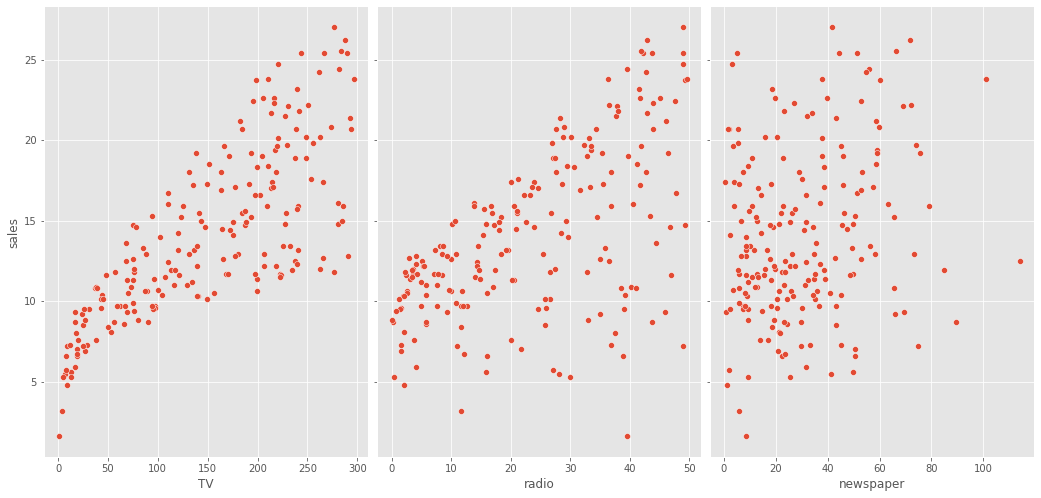

In [17]:
sns.pairplot(data=adv,
            x_vars=['TV', 'radio', 'newspaper'],
            y_vars='sales',
            height=7,
            aspect=0.7);

+ We can see that there is a positive relationship between TV and Sales.

## Part 4: Multiple Linear Regression - Estimating Coefficients

In [47]:
# Separate features and labels
X = adv.drop(['sales'], axis=1)
y = adv['sales']

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr1 = LinearRegression()
lr1.fit(X, y)

LinearRegression()

In [50]:
lr1.intercept_

2.9388893694594103

In [51]:
lr1.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [52]:
list(zip(X.columns,  lr1.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820442),
 ('newspaper', -0.0010374930424763007)]

In [53]:
list(zip(X.columns,  lr1.coef_ * 1000))

[('TV', 45.7646454553976),
 ('radio', 188.5300169182044),
 ('newspaper', -1.0374930424763007)]

Based on the numbers above, we can interpret as following.
+ Spending 1000 dollars in Radio advertisting leads to an increase in 188.5 dollars in Sales.
+ For newspaper, the relationship with Sales is almost 0.

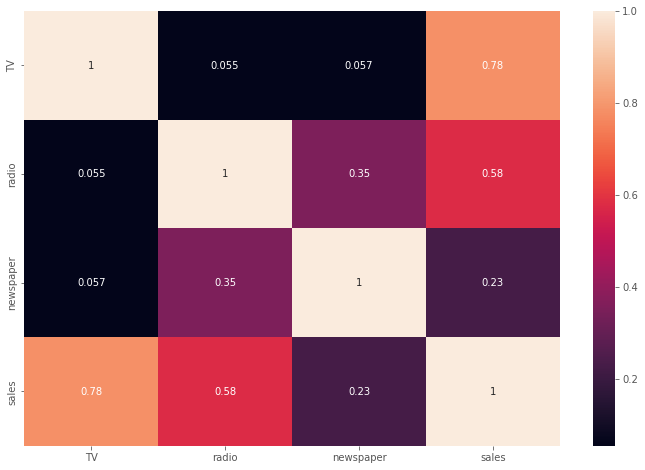

In [55]:
sns.heatmap(adv.corr(), annot=True);

## Part 5: Feature Selection

In [93]:
from sklearn.metrics import r2_score

In [92]:
# Model with TV and Radio only

lr2 = LinearRegression()

lr2.fit(X[['TV', 'radio']], y)

lr2_pred = lr2.predict(X[['TV', 'radio']])

lr2_score = r2_score(y, lr2_pred)
print('R^2 Score:', lr2_score)

R^2 Score: 0.8971942610828956


In [94]:
# Model with all 3 features

lr3 = LinearRegression()

lr3.fit(X[['TV', 'radio', 'newspaper']], y)

lr3_pred = lr3.predict(X[['TV', 'radio', 'newspaper']])

lr3_score = r2_score(y, lr3_pred)
print('R^2 Score:', lr3_score)

R^2 Score: 0.8972106381789522


In [95]:
lr3_score - lr2_score

1.6377096056618967e-05

### Summary: What features should we select?
+ If we look at r^2 score, improvement from model with 2 features (exlcuding Newsapaper) to model with 3 features is only 1.637 which is just a slight improvment.
+ we can conclude that Newspaper feature doesn't really have a big impact on sales, we can safely exclude it.
+ As a result, we have selected to use TV and Radio features.

## Part 6: Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

#### Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [119]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Model with 3 features

In [112]:
X = adv.drop(['sales'], axis=1)
y = adv['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr4 = LinearRegression()
lr4.fit(X_train, y_train)

lr4_pred = lr4.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, lr4_pred))
r2_score = r2_score(y_test, lr4_pred)

print('RMSE: ', rmse)
print('R^2 score: ', r2_score)

RMSE:  1.7815996615334502
R^2 score:  0.899438024100912


### Model with 2 features - TV, Radio

In [120]:
X = adv[['TV', 'radio']]
y = adv['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr5 = LinearRegression()
lr5.fit(X_train, y_train)

lr5_pred = lr5.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, lr5_pred))
r2_score = r2_score(y_test, lr5_pred)

print('RMSE: ', rmse)
print('R^2 score: ', r2_score)

RMSE:  1.7714254173033517
R^2 score:  0.9005833101920356


+ RMSE and R^2 score got improved from model with all features which reinforced our initial findings "Newspaper feature doesn't have big impact on Sales".

We can visualize using plot too.

### Visualization with Yellowbrick

In [133]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


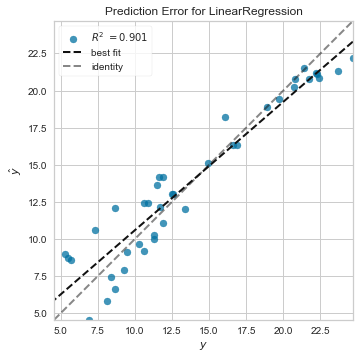

In [134]:
visualizer = PredictionError(lr5).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

#### Summary: How we can interpret?
+ We can see that our idenity line is a bit off from best fit line.
This can mean:
+ either some of the data is non-linear
+ or there is some kind of Interaction Effect

## Part 7: Interaction Effect (Synergy)

+ A **synergistic effect** is the result of two or more processes interacting together to produce an effect that is greater than the cumulative effect that those processes produce when used individually.

#### Is ther Synergy among Advertising Media Channel?
According to Synergy effect, for our Sales prediction problem set:
+ Increase in Radio spending can increase in TV impact on Sales.
+ Meaning that for Marketing head making a decision of rather than spending whole amount on either Radio or TV, he/she should allocate spending on both channels. This can lead to bigger improvement on sales rather than on spending on ONLY ONE CHANNEL.

We can find out about it as following.

### Creating new feature (3rd term) based on our selected 2 features (TV, Radio)

In [136]:
# simple multiplication of 2 features
adv['Interaction'] = adv['TV'] * adv['radio']

### Building Model using `Interaction` term

In [139]:
from sklearn.metrics import r2_score

In [140]:
X = adv[['TV', 'radio', 'Interaction']]
y = adv['sales']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr6 = LinearRegression()
lr6.fit(X_train, y_train)

lr6_pred = lr6.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, lr6_pred))
r2_score = r2_score(y_test, lr6_pred)

print('RMSE: ', rmse)
print('R^2 score: ', r2_score)

RMSE:  0.9015041958168878
R^2 score:  0.9742516704050705


Wow.. this is a HUGE improvement from our last model with 2 features!

C:\Users\Phone Thiri Yadana\.conda\envs\venv-rf\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


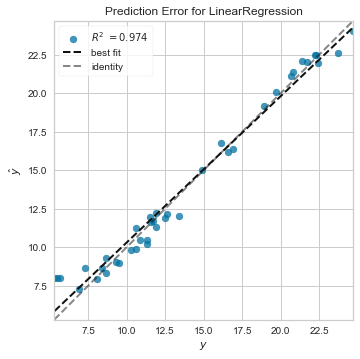

In [142]:
visualizer = PredictionError(lr6).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();